# ОИАД. Лабораторная работа №2

## Входные данные
Датасет: **datasets/students_simple.csv**
Выбираются 2 слобкика данных по формулам:
1) $N$ % 5
2) $N^2$ % 5 + 5 
где $N$ - номер в списке

## 1. Расчет корреляций
1. Фехнера
2. Пирсона + доверительный интервал
3. Спирмена
4. Кенделла

## 2. Визуализация
1. Гистограммы
2. График рассеяния (scatter plot)

## 3. Уравнение регрессии
Построить уравнение регрессии по видам:
1. линейная, $y=w_1 x + w_0$
2. квадратичная, $y = w_2 x^2 + w_1 x + w_0$
3. гиперболическая, $y = \frac{w_1}{x} + w_0$ 
4. показательная, $y = w_1^x \cdot w_0$

Показать результаты на графиках

## 4. Проверка уравнения регрессии
Для наилучшего и наихудшего уравнения регрессии проверить соотвествие моедли данным с помощью критерия Фишера

## 5. Выводы
Сделать вывод по каждому пункту

# Выбор варианта

In [16]:
N = 16
variants = ["height","test_time","income","iq","pages",
             "age","bmi","work_exp","friends","test_time"]

col1 = variants[N % 5]
col2 = variants[(N**2) % 5 + 5]

print(col1)
print(col2)

test_time
bmi


# Считываем файл и столбики для варианта

In [17]:
import csv
import numpy as np

test_time = []
bmi = []

with open('datasets/students_simple.csv', 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        test_time.append(float(row['test_time']))
        bmi.append(float(row['bmi']))

test_time = np.array(test_time)
bmi = np.array(bmi)

print("test_time:")
print(test_time)
print(f'Len: {len(test_time)}')

print("bmi:")
print(bmi)
print(f'Len: {len(bmi)}')

test_time:
[ 8.5  6.2  6.8 12.   7.5 10.   7.2  4.2  3.5  9.5  7.8  8.   6.   4.8
  8.6 10.   4.5 12.5 10.5  6.5]
Len: 20
bmi:
[3.533 2.623 2.875 3.375 3.    2.828 3.255 2.726 2.429 2.361 2.342 2.672
 2.356 2.559 2.173 2.095 2.342 2.011 2.691 2.021]
Len: 20


## 1. Расчет корреляций
1.Фехнера
 
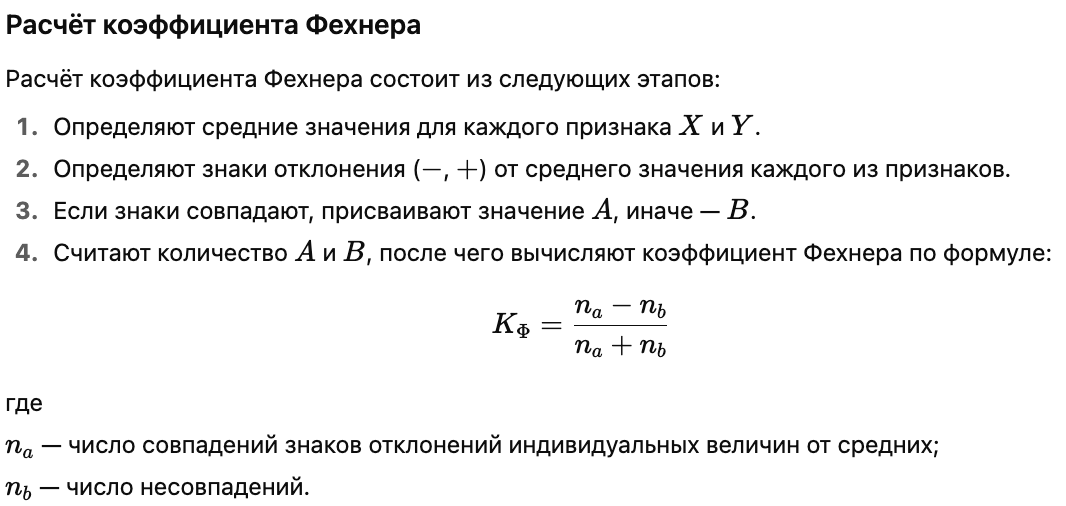

In [53]:
import numpy as np

def calculate_mean(data):
    return sum(data) / len(data)

def correlation_fechner(x, y):
    x_mean = calculate_mean(x)
    y_mean = calculate_mean(y)

    # знаки отклонений
    x_signs = np.sign(x - x_mean)
    y_signs = np.sign(y - y_mean)

    # совпадения и несовпадения знаков
    matches = np.sum(x_signs == y_signs)
    mismatches = np.sum(x_signs != y_signs)

    # коэффициент Фехнера
    fechner = (matches - mismatches) / (matches + mismatches)
    return fechner

print(f'Fechner correlation: {correlation_fechner(test_time, bmi)}')


Fechner correlation: 0.0


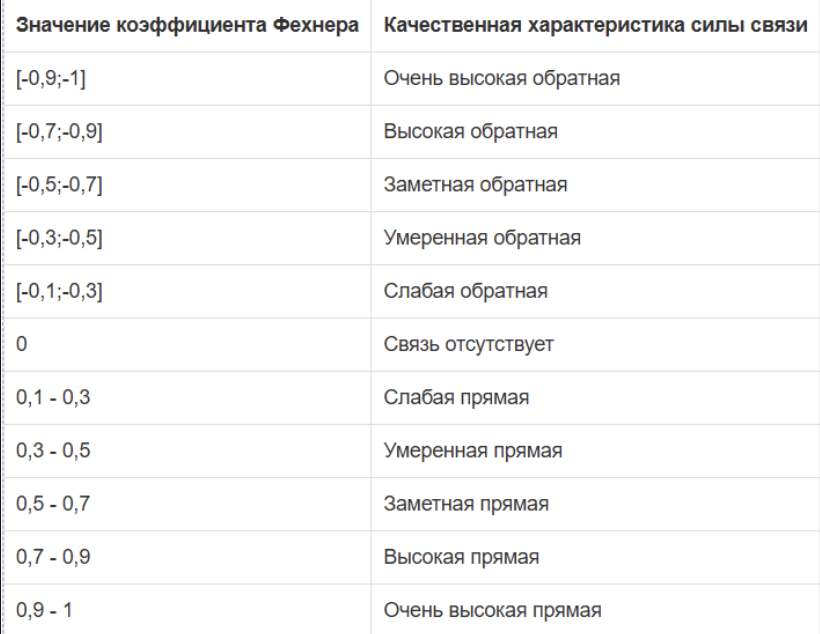

Коэфицент корреляции -0.4, что указыает на умеренную обратную корреляцию

# 2. Пирсона + доверительный интервал

# Коэфицент:
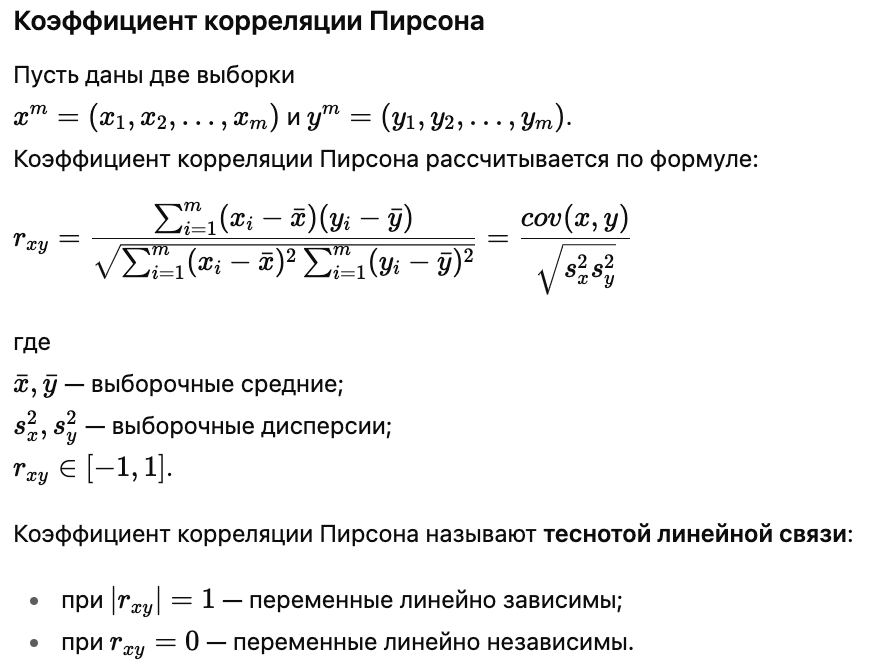

# T-статистика
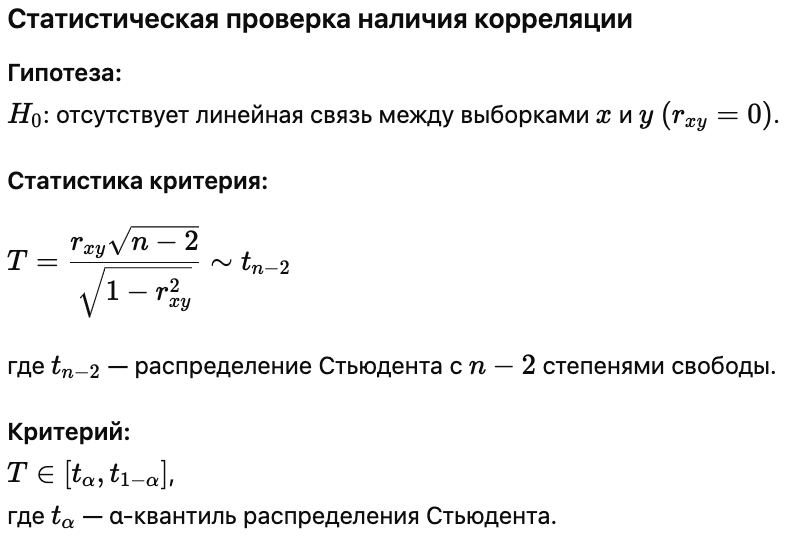
# Превращение Фишера
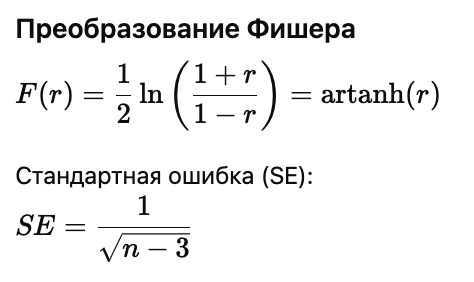

In [22]:
import numpy as np
import scipy.stats as stats

def calculate_mean(data):
    return sum(data) / len(data)

def cov(x, y):
    s = 0
    x_mean = calculate_mean(x)
    y_mean = calculate_mean(y)
    for i in range(len(x)):
        s += (x[i] - x_mean) * (y[i] - y_mean)
    return s / len(x)

def correlation_pearson(x, y, confidence=0.95):
    n = len(x)
    covariance = cov(x, y)
    std_x = np.sqrt(np.sum((x - calculate_mean(x)) ** 2) / (n - 1))
    std_y = np.sqrt(np.sum((y - calculate_mean(y)) ** 2) / (n - 1))
    coef = covariance / (std_x * std_y)

    t_statistic = coef * np.sqrt((n - 2) / (1 - coef ** 2))
    p_value = 2 * (1 - stats.t.cdf(abs(t_statistic), n - 2))

    z = np.arctanh(coef)
    se_z = 1 / np.sqrt(n - 3)
    z_critical = stats.norm.ppf((1 + confidence) / 2)

    z_lower = z - z_critical * se_z
    z_upper = z + z_critical * se_z

    r_lower = np.tanh(z_lower)
    r_upper = np.tanh(z_upper)

    return {
        'correlation': coef,
        'p_value': p_value,
        't_statistic': t_statistic,
        'ci_lower': r_lower,
        'ci_upper': r_upper,
        'confidence_level': confidence
    }

print(correlation_pearson(test_time, bmi))

{'correlation': np.float64(0.07654076161476925), 'p_value': np.float64(0.748414261272548), 't_statistic': np.float64(0.32569037746112206), 'ci_lower': np.float64(-0.37881067042471606), 'ci_upper': np.float64(0.5020564511139791), 'confidence_level': 0.95}


# Выводы
Значение correlation: 0.0765 указывает на очень слабую положительную связь между показателями test_time и bmi.

Значение p_value = 0.7484 высокое, следовательно, мы не можем отвергнуть нулевую гипотезу об отсутствии корреляции между признаками.

Доверительный интервал [-0.3788; 0.5020] включает 0, что подтверждает отсутствие статистически значимой зависимости между переменными, неопределенность

# 3. Спирмена
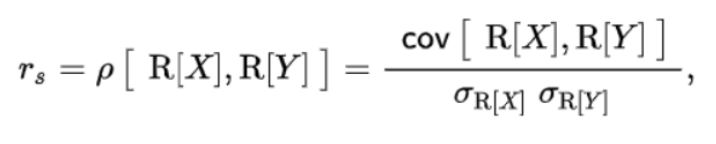

In [23]:
import math
import numpy as np

def get_ranks(data):
    indexed_data = [(value, idx) for idx, value in enumerate(data)]
    sorted_data = sorted(indexed_data, key=lambda x: x[0])
    ranks = [0] * len(data)

    i = 0
    while i < len(sorted_data):
        j = i
        while j < len(sorted_data) - 1 and math.isclose(sorted_data[j][0], sorted_data[j + 1][0]):
            j += 1
        tie_count = j - i + 1
        average_rank = (i + 1 + j + 1) / 2
        for k in range(i, j + 1):
            original_index = sorted_data[k][1]
            ranks[original_index] = average_rank
        i = j + 1
    return ranks

def correlation_spearman(x, y):
    n = len(x)

    x_ranks = get_ranks(x)
    y_ranks = get_ranks(y)

    x_mean = np.mean(x_ranks)
    y_mean = np.mean(y_ranks)

    covariance = np.sum((np.array(x_ranks) - x_mean) * (np.array(y_ranks) - y_mean)) / n
    std_x = math.sqrt(np.sum((np.array(x_ranks) - x_mean) ** 2))
    std_y = math.sqrt(np.sum((np.array(y_ranks) - y_mean) ** 2))

    if std_x * std_y == 0:
        return 0
    else:
        return covariance / (std_x * std_y)



In [24]:
print("Spearman correlation:", correlation_spearman(test_time, bmi))


Spearman correlation: 0.001203912716328066


Полное отсутствие ранговой корреляции между показателями

# 4. Кенделла
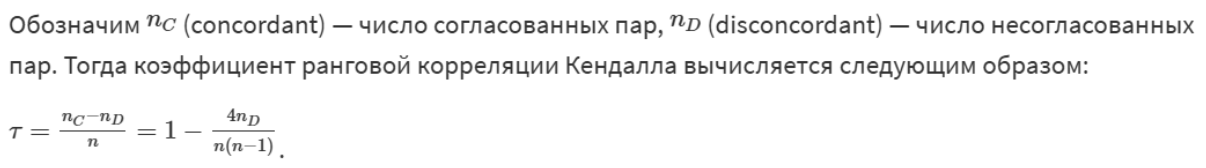

In [ ]:
import math

def count_ties(ranks):
    rank_counts = {}
    for rank in ranks:
        rank_counts[rank] = rank_counts.get(rank, 0) + 1
    
    ties = 0
    for count in rank_counts.values():
        if count > 1:
            ties += count * (count - 1) / 2
    return ties

def correlation_kendall(x, y):
    n = len(x)
    ranks_x = get_ranks(x)
    ranks_y = get_ranks(y)

    concordant = 0
    discordant = 0

    for i in range(n):
        for j in range(i + 1, n):
            dx = ranks_x[i] - ranks_x[j]
            dy = ranks_y[i] - ranks_y[j]
            if dx * dy > 0:
                concordant += 1
            elif dx * dy < 0:
                discordant += 1

    total_pairs = n * (n - 1) / 2
    ties_x = count_ties(ranks_x)
    ties_y = count_ties(ranks_y)

    adjusted_total = math.sqrt((total_pairs - ties_x) * (total_pairs - ties_y))

    tau = 0.0 if adjusted_total == 0 else (concordant - discordant) / adjusted_total
    return tau


In [27]:
print("Kendall correlation:", correlation_kendall(test_time, bmi))


Kendall correlation: 0.031746031746031744


Практически полное отсутствие связи между показателями

In [29]:
print(f'Fechner correlation: {correlation_fechner(test_time, bmi)}')
print(f'Pearson correlation: {correlation_pearson(test_time, bmi)["correlation"]}')
print(f'Spearman correlation: {correlation_spearman(test_time, bmi)}')
print(f'Kendall correlation: {correlation_kendall(test_time, bmi)}')


Fechner correlation: 0.0
Pearson correlation: 0.07654076161476925
Spearman correlation: 0.001203912716328066
Kendall correlation: 0.031746031746031744


Все виды корреляции: Фехнера, Пирсона, Спирмена, Кендалла 

## 2. Визуализация
1. Гистограммы
2. График рассеяния (scatter plot)

In [30]:
import matplotlib.pyplot as plt

def plot_histogram(data, bins=10, title="Гистограмма распределения"):
    plt.figure(figsize=(8, 5))
    plt.hist(data, bins=bins, color='skyblue', edgecolor='black', alpha=0.7, density=True)
    plt.title(title, fontsize=13)
    plt.xlabel('Значения', fontsize=11)
    plt.ylabel('Плотность вероятности', fontsize=11)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()


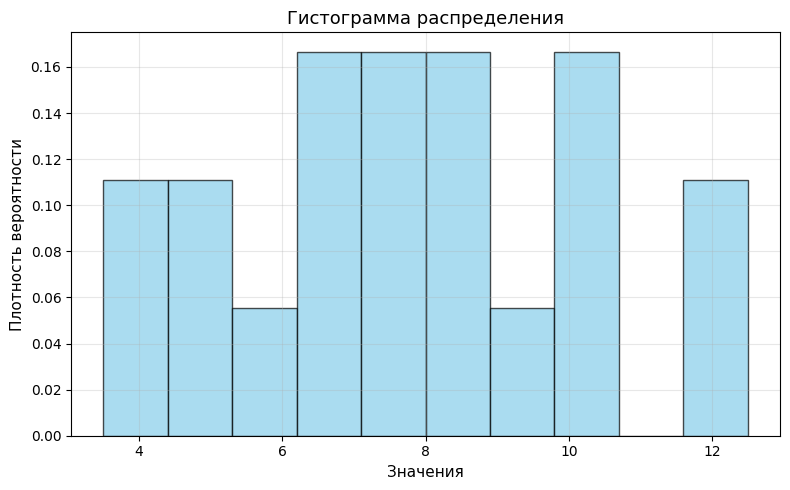

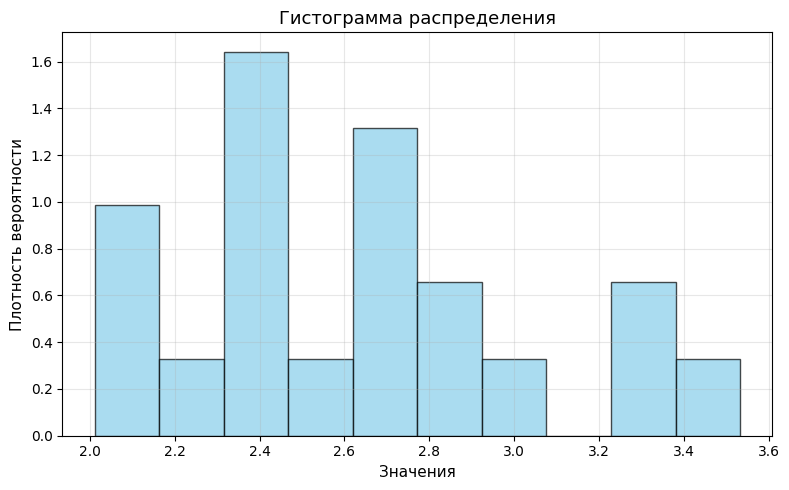

In [32]:
plot_histogram(test_time)
plot_histogram(bmi)


In [34]:
def scatter_plot(array, title="Диаграмма рассеяния", xlabel="Номер наблюдения", ylabel="Значения", color='blue', alpha=0.7):
    plt.figure(figsize=(8, 5))
    plt.scatter(range(len(array)), array, color=color, alpha=alpha, s=50)
    plt.title(title, fontsize=13, fontweight='bold')
    plt.xlabel(xlabel, fontsize=11)
    plt.ylabel(ylabel, fontsize=11)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

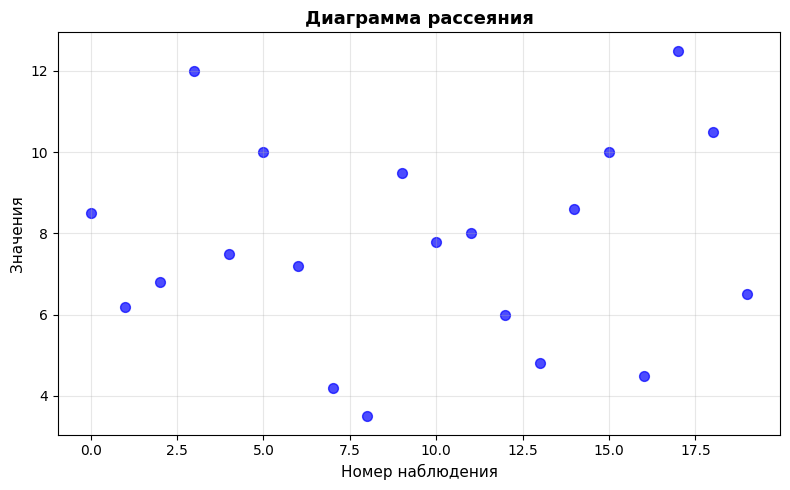

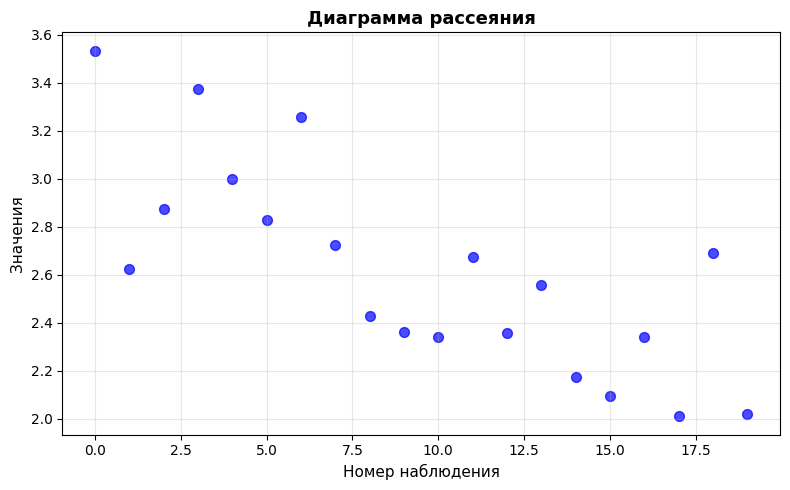

In [35]:
scatter_plot(test_time)
scatter_plot(bmi)

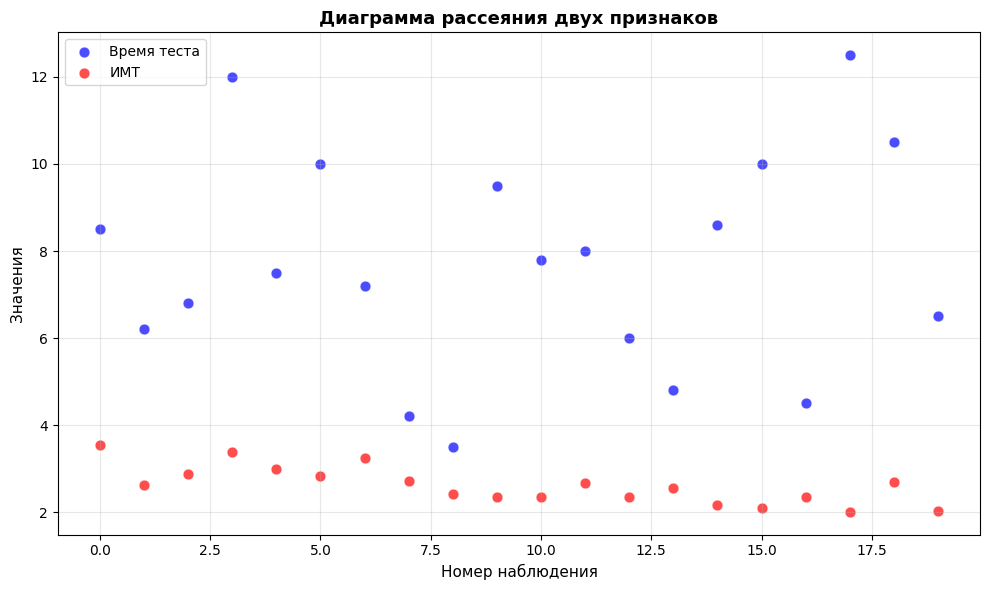

In [36]:
def scatter_plot_two_arrays(array1, array2, labels=None, title="Диаграмма рассеяния двух признаков",
                            xlabel="Номер наблюдения", ylabel="Значения", colors=None, alpha=0.7):
    if colors is None:
        colors = ['blue', 'red']
    if labels is None:
        labels = ['Признак 1', 'Признак 2']
    
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(array1)), array1, color=colors[0], alpha=alpha, s=60,
                edgecolors='white', linewidth=0.5, label=labels[0])
    plt.scatter(range(len(array2)), array2, color=colors[1], alpha=alpha, s=60,
                edgecolors='white', linewidth=0.5, label=labels[1])
    
    plt.title(title, fontsize=13, fontweight='bold')
    plt.xlabel(xlabel, fontsize=11)
    plt.ylabel(ylabel, fontsize=11)
    plt.legend(fontsize=10)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

scatter_plot_two_arrays(test_time, bmi, labels=['Время теста', 'ИМТ'])


# По графику достаточно сложно увидеть обратную корреляцию оторбражаемую в тестах

## 3. Уравнение регрессии
Построить уравнение регрессии по видам:
1. линейная, $y=w_1 x + w_0$
2. квадратичная, $y = w_2 x^2 + w_1 x + w_0$
3. гиперболическая, $y = \frac{w_1}{x} + w_0$ 
4. показательная, $y = w_1^x \cdot w_0$

Показать результаты на графиках

# 1. Линейная регрессия

# Вычисление параметров регрессии:
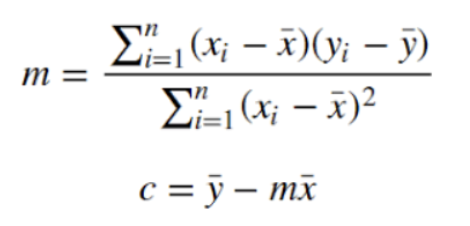
# Вычисление коэфицента детерминации:
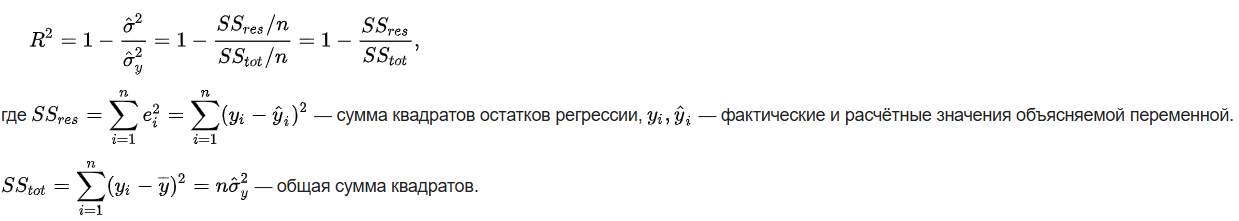


In [37]:
import matplotlib.pyplot as plt

def linear_regression(x, y):
    n = len(x)
    mean_x = calculate_mean(x)
    mean_y = calculate_mean(y)

    num = sum((x[i] - mean_x) * (y[i] - mean_y) for i in range(n))
    den = sum((x[i] - mean_x) ** 2 for i in range(n))
    m = num / den
    b = mean_y - m * mean_x

    # предсказанные значения
    y_pred = [m * xi + b for xi in x]

    # коэффициент детерминации (качество аппроксимации)
    ss_total = sum((yi - mean_y) ** 2 for yi in y)
    ss_res = sum((y[i] - y_pred[i]) ** 2 for i in range(n))
    r2 = 1 - (ss_res / ss_total)

    plt.figure(figsize=(8, 5))
    plt.scatter(x, y, color="blue", label="Исходные данные")
    plt.plot(x, y_pred, color="red", label="Линия регрессии")
    plt.title("Линейная регрессия", fontsize=13)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

    print(f"Уравнение регрессии: y = {m:.4f}x + {b:.4f}")
    print(f"Коэффициент детерминации R² = {r2:.4f}")

    return m, b, r2


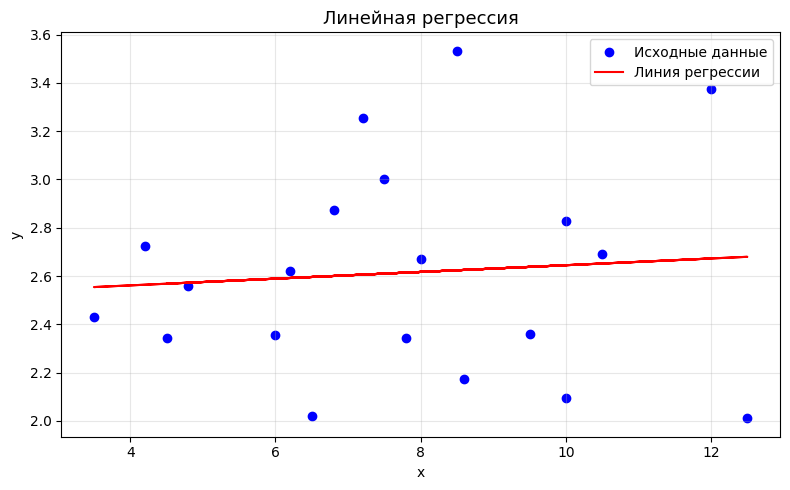

Уравнение регрессии: y = 0.0139x + 2.5057
Коэффициент детерминации R² = 0.0065
R² = 0.0065


In [39]:
_, _, r2_linear = linear_regression(test_time, bmi)
print(f'R² = {r2_linear:.4f}')


# Полученная прямая плохо аппроксимирует значения, и коэфицент $R^2$ достаточно низкий, что говорит о вероятном отсутствии корреляции

# 2. Квадратическая регрессия

# Функция для минимизации:
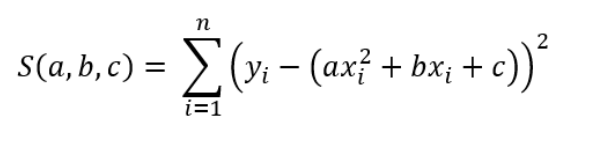
# В частных производных 

∂S/∂a=0 
∂𝑆/∂𝑏=0 
∂S/∂c=0

Получим систему:

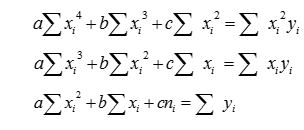

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def quadratic_regression(x, y):
    n = len(x)

    # суммы для системы нормальных уравнений
    Sx4 = sum(xi**4 for xi in x)
    Sx3 = sum(xi**3 for xi in x)
    Sx2 = sum(xi**2 for xi in x)
    Sx1 = sum(xi for xi in x)
    Sx0 = n

    Sy = sum(y)
    Sx1y = sum(x[i] * y[i] for i in range(n))
    Sx2y = sum((x[i]**2) * y[i] for i in range(n))

    # матрица системы и правая часть
    A = [
        [Sx4, Sx3, Sx2],
        [Sx3, Sx2, Sx1],
        [Sx2, Sx1, Sx0]
    ]
    B = [Sx2y, Sx1y, Sy]

    # решение системы
    a, b, c = np.linalg.solve(np.array(A, float), np.array(B, float))

    # предсказанные значения
    y_pred = [a * xi**2 + b * xi + c for xi in x]

    # коэффициент детерминации
    mean_y = np.mean(y)
    ss_tot = sum((yi - mean_y)**2 for yi in y)
    ss_res = sum((y[i] - y_pred[i])**2 for i in range(n))
    r2 = 1 - ss_res / ss_tot

    plt.figure(figsize=(8, 5))
    plt.scatter(x, y, color="blue", label="Исходные данные")
    plt.plot(sorted(x), [a*xi**2 + b*xi + c for xi in sorted(x)], color="red", label="Квадратичная аппроксимация")
    plt.title("Квадратичная регрессия", fontsize=13)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

    print(f"Уравнение регрессии: y = {a:.4f}x² + {b:.4f}x + {c:.4f}")
    print(f"Коэффициент детерминации R² = {r2:.4f}")

    return a, b, c, r2


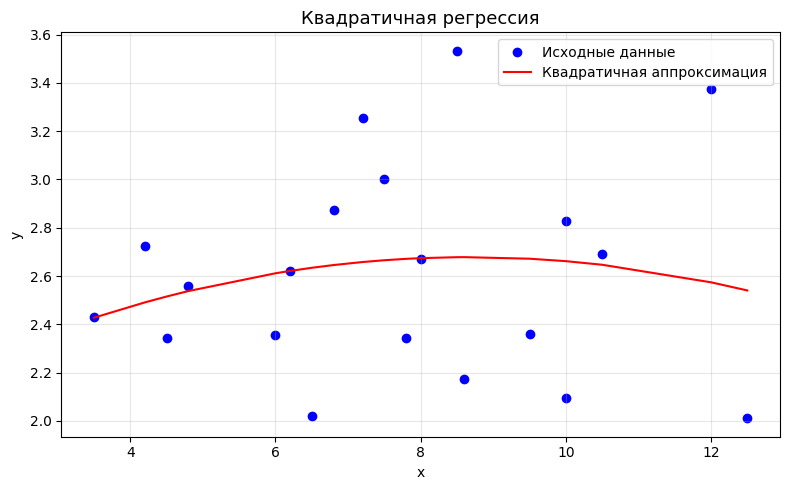

Уравнение регрессии: y = -0.0094x² + 0.1628x + 1.9728
Коэффициент детерминации R² = 0.0284
R² = 0.0284


In [41]:
_, _, _, r2_quadratic = quadratic_regression(test_time, bmi)
print(f'R² = {r2_quadratic:.4f}')


# Квадратичная регрессия выглядит ближе к точкам, и коэфицент $R^2$ выше

# 3. Гиперблоическая регрессия
Те же самые формулы что и для линейное регрессии, но с предварительной трансформацеий $z=1/x$

In [43]:
import matplotlib.pyplot as plt

def hyperbolic_regression(x, y):
    # преобразование переменной
    z = [1 / xi for xi in x]

    n = len(z)
    mean_z = sum(z) / n
    mean_y = sum(y) / n

    # параметры по формулам линейной регрессии
    num = sum((z[i] - mean_z) * (y[i] - mean_y) for i in range(n))
    den = sum((z[i] - mean_z) ** 2 for i in range(n))
    m = num / den
    b = mean_y - m * mean_z

    # модель y = m/x + b
    y_pred = [m / xi + b for xi in x]

    # коэффициент детерминации
    ss_total = sum((yi - mean_y) ** 2 for yi in y)
    ss_res = sum((y[i] - y_pred[i]) ** 2 for i in range(n))
    r2 = 1 - ss_res / ss_total

    plt.figure(figsize=(8, 5))
    plt.scatter(x, y, color="blue", label="Исходные данные")
    plt.plot(sorted(x), [m / xi + b for xi in sorted(x)], color="red", label="Гиперболическая аппроксимация")
    plt.title("Гиперболическая регрессия", fontsize=13)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

    print(f"Уравнение регрессии: y = {m:.4f}/x + {b:.4f}")
    print(f"Коэффициент детерминации R² = {r2:.4f}")

    return m, b, r2


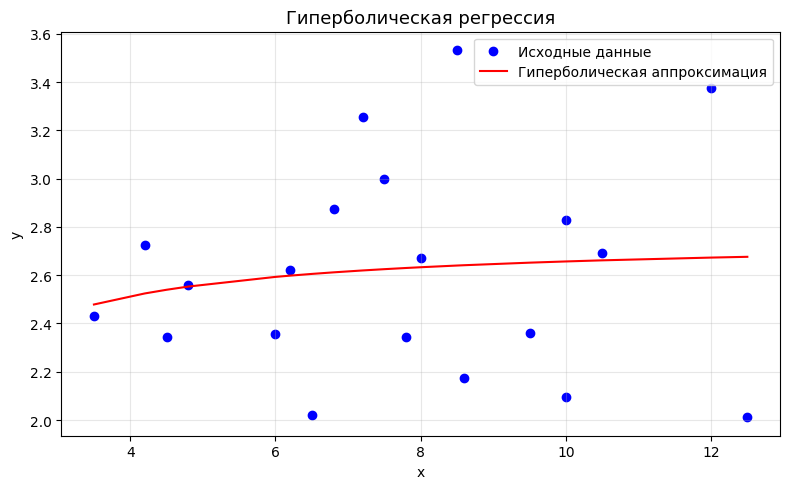

Уравнение регрессии: y = -0.9601/x + 2.7529
Коэффициент детерминации R² = 0.0147
R^2 0.014745977253353915


In [44]:
_, _, r2_hyperbolic = hyperbolic_regression(test_time, bmi)
print(f'R^2 {r2_hyperbolic}')

# Самая худшая регрессия 

# Показательная регрессия

Те же самые формулы что и для линейное регрессии, но с предварительной трансформацеий $x=ln(x)$ $y=ln(y)$

In [45]:
import math
import matplotlib.pyplot as plt

def power_regression(x, y):
    # логарифмическое преобразование переменных
    logx = [math.log(xi) for xi in x]
    logy = [math.log(yi) for yi in y]

    n = len(logx)
    mean_logx = sum(logx) / n
    mean_logy = sum(logy) / n

    # параметры по формулам линейной регрессии
    num = sum((logx[i] - mean_logx) * (logy[i] - mean_logy) for i in range(n))
    den = sum((logx[i] - mean_logx) ** 2 for i in range(n))
    b = num / den
    loga = mean_logy - b * mean_logx
    a = math.exp(loga)

    # предсказанные значения
    y_pred = [a * (xi ** b) for xi in x]

    # коэффициент детерминации
    mean_y = sum(y) / len(y)
    ss_tot = sum((yi - mean_y) ** 2 for yi in y)
    ss_res = sum((y[i] - y_pred[i]) ** 2 for i in range(len(y)))
    r2 = 1 - ss_res / ss_tot

    plt.figure(figsize=(8, 5))
    plt.scatter(x, y, color="blue", label="Исходные данные")
    plt.plot(sorted(x), [a * (xi ** b) for xi in sorted(x)], color="red", label="Степенная аппроксимация")
    plt.title("Степенная регрессия", fontsize=13)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

    print(f"Уравнение регрессии: y = {a:.4f} * x^{b:.4f}")
    print(f"Коэффициент детерминации R² = {r2:.4f}")

    return a, b, r2


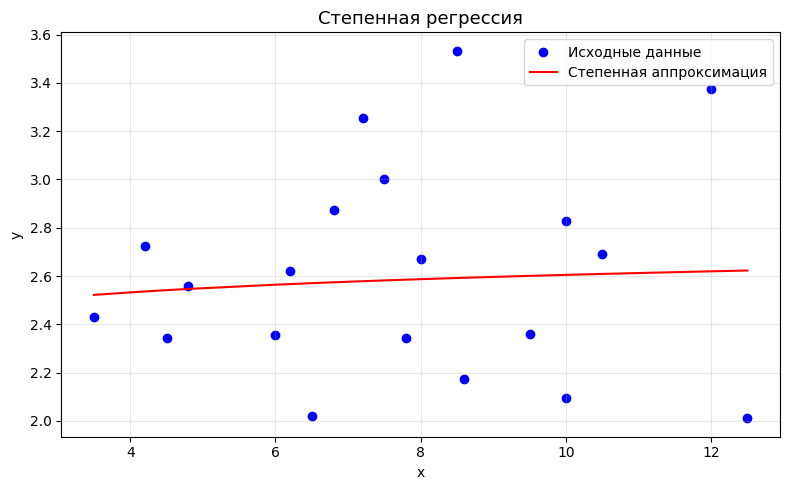

Уравнение регрессии: y = 2.4265 * x^0.0308
Коэффициент детерминации R² = 0.0031
R^2 0.003090933800087181


In [46]:
_, _, r2_power = power_regression(test_time, bmi)
print(f'R^2 {r2_power}')

## 4. Проверка уравнения регрессии
Для наилучшего и наихудшего уравнения регрессии проверить соотвествие моедли данным с помощью критерия Фишера


In [47]:
print(f'Linear: {r2_linear}')
print(f'Quadratic: {r2_quadratic}')
print(f'Hyperbolic: {r2_hyperbolic}')
print(f'Power: {r2_power}')

Linear: 0.00649139965492429
Quadratic: 0.028406391518408847
Hyperbolic: 0.014745977253353915
Power: 0.003090933800087181


# Самое лучшее уравнение - квадратичное. Самое худшее - гиперболическое
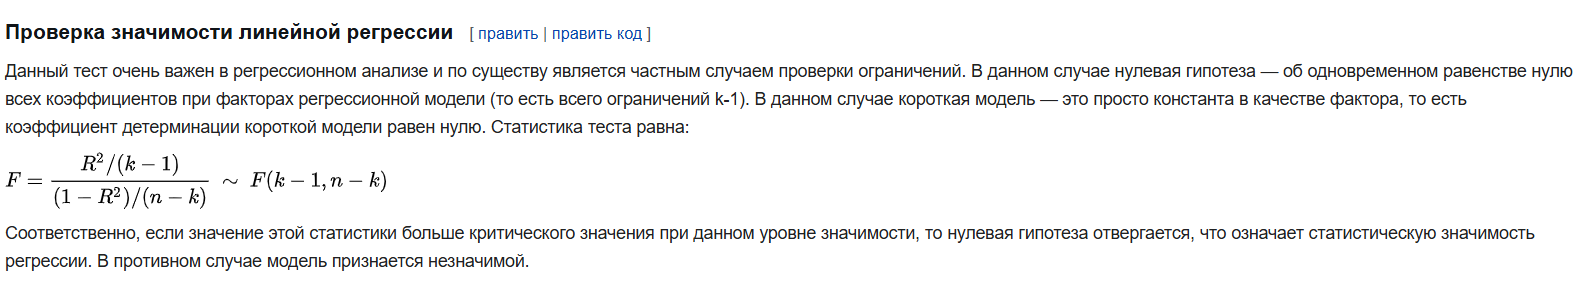

In [49]:
from scipy.stats import f
import numpy as np

def quadratic_regression_test(x, y, alpha=0.05):
    n = len(x)

    # суммы для системы нормальных уравнений
    Sx4 = sum(xi**4 for xi in x)
    Sx3 = sum(xi**3 for xi in x)
    Sx2 = sum(xi**2 for xi in x)
    Sx1 = sum(xi for xi in x)
    Sx0 = n

    Sy = sum(y)
    Sx1y = sum(x[i] * y[i] for i in range(n))
    Sx2y = sum((x[i]**2) * y[i] for i in range(n))

    # матрица системы и правая часть
    A = [
        [Sx4, Sx3, Sx2],
        [Sx3, Sx2, Sx1],
        [Sx2, Sx1, Sx0]
    ]
    B = [Sx2y, Sx1y, Sy]

    # решение системы уравнений
    a, b, c = np.linalg.solve(np.array(A, float), np.array(B, float))

    # предсказанные значения
    y_pred = [a * xi**2 + b * xi + c for xi in x]

    # суммы квадратов
    mean_y = np.mean(y)
    ss_tot = sum((yi - mean_y)**2 for yi in y)
    ss_res = sum((y[i] - y_pred[i])**2 for i in range(n))
    ss_reg = ss_tot - ss_res

    # коэффициент детерминации
    r2 = 1 - ss_res / ss_tot

    # степени свободы
    k = 3  # число параметров (a, b, c)
    df_reg = k - 1
    df_res = n - k

    # средние квадраты
    ms_reg = ss_reg / df_reg
    ms_res = ss_res / df_res

    # F-статистика и критическое значение
    f_statistic = ms_reg / ms_res
    f_critical = f.ppf(1 - alpha, df_reg, df_res)

    # проверка адекватности
    is_model_adequate = f_statistic > f_critical

    print(f"R² = {r2:.4f}")
    print(f"F-statistic = {f_statistic:.4f}")
    print(f"F-critical (α={alpha}) = {f_critical:.4f}")
    print(f"Model adequate: {is_model_adequate}")
    print(f"SS_reg = {ss_reg:.4f}, SS_res = {ss_res:.4f}")
    print(f"MS_reg = {ms_reg:.4f}, MS_res = {ms_res:.4f}")
    print(f"Degrees of freedom — regression: {df_reg}, residual: {df_res}")

    return f_statistic, f_critical, is_model_adequate


In [50]:
print(f'{quadratic_regression_test(test_time, bmi)[2]}')
print('============================================')
print(f'{quadratic_regression_test(test_time, bmi, alpha=0.1)[2]}')


R² = 0.0284
F-statistic = 0.2485
F-critical (α=0.05) = 3.5915
Model adequate: False
SS_reg = 0.1027, SS_res = 3.5116
MS_reg = 0.0513, MS_res = 0.2066
Degrees of freedom — regression: 2, residual: 17
False
R² = 0.0284
F-statistic = 0.2485
F-critical (α=0.1) = 2.6446
Model adequate: False
SS_reg = 0.1027, SS_res = 3.5116
MS_reg = 0.0513, MS_res = 0.2066
Degrees of freedom — regression: 2, residual: 17
False


In [51]:
from scipy.stats import f
import matplotlib.pyplot as plt

def hyperbolic_regression_test(x, y, alpha=0.05):
    # преобразование переменной
    z = [1 / xi for xi in x]

    n = len(z)
    mean_z = sum(z) / n
    mean_y = sum(y) / n

    # параметры модели
    num = sum((z[i] - mean_z) * (y[i] - mean_y) for i in range(n))
    den = sum((z[i] - mean_z) ** 2 for i in range(n))
    m = num / den
    b = mean_y - m * mean_z

    # предсказанные значения
    y_pred = [m / xi + b for xi in x]

    # суммы квадратов
    ss_total = sum((yi - mean_y) ** 2 for yi in y)
    ss_res = sum((y[i] - y_pred[i]) ** 2 for i in range(n))
    ss_reg = ss_total - ss_res

    # коэффициент детерминации
    r2 = 1 - (ss_res / ss_total)

    # степени свободы
    k = 2
    df_reg = k - 1
    df_res = n - k

    # средние квадраты
    ms_reg = ss_reg / df_reg
    ms_res = ss_res / df_res

    # F-статистика и критическое значение
    f_statistic = ms_reg / ms_res
    f_critical = f.ppf(1 - alpha, df_reg, df_res)

    # проверка адекватности модели
    is_model_adequate = f_statistic > f_critical

    print(f"Уравнение регрессии: y = {m:.4f}/x + {b:.4f}")
    print(f"R² = {r2:.4f}")
    print(f"F-statistic = {f_statistic:.4f}")
    print(f"F-critical (α={alpha}) = {f_critical:.4f}")
    print(f"Model adequate: {is_model_adequate}")
    print(f"SS_reg = {ss_reg:.4f}, SS_res = {ss_res:.4f}")
    print(f"MS_reg = {ms_reg:.4f}, MS_res = {ms_res:.4f}")
    print(f"Degrees of freedom — regression: {df_reg}, residual: {df_res}")

    return f_statistic, f_critical, is_model_adequate


In [52]:
print(hyperbolic_regression_test(test_time, bmi)[2])
print('============================================')
print(f'{hyperbolic_regression_test(test_time, bmi, alpha=0.1)[2]}')


Уравнение регрессии: y = -0.9601/x + 2.7529
R² = 0.0147
F-statistic = 0.2694
F-critical (α=0.05) = 4.4139
Model adequate: False
SS_reg = 0.0533, SS_res = 3.5610
MS_reg = 0.0533, MS_res = 0.1978
Degrees of freedom — regression: 1, residual: 18
False
Уравнение регрессии: y = -0.9601/x + 2.7529
R² = 0.0147
F-statistic = 0.2694
F-critical (α=0.1) = 3.0070
Model adequate: False
SS_reg = 0.0533, SS_res = 3.5610
MS_reg = 0.0533, MS_res = 0.1978
Degrees of freedom — regression: 1, residual: 18
False


# Обе модели — квадратичная и гиперболическая — неадекватны, R^2 низкий, зависимости между test_time и bmi не выявлено.